## Load the packages & data

In [8]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statistics

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [13]:
df_review = joblib.load('review_no_text.py') 

In [14]:
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,2017-01-14 20:54:15


## Basic descriptives of variables in review dataset

1. distribution of stars (for all reviews)
2. number of reviews over time
3. Any relationship between stars & useful/funny/cool


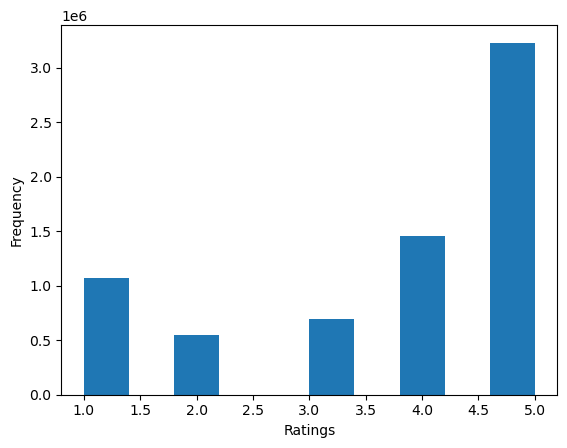

In [15]:
# basic 1: 
plt.figure()
plt.hist(df_review['stars'], bins = 10)
plt.xlabel('Ratings') # The ratings are aggregated results but not strictly average. 
plt.ylabel('Frequency')
plt.show()

### Five stars and one star are the most frequent ratings.
Does it suggest the action of leaving reviews/ratings is triggered by strong emotion?

In [10]:
# number of reviews over the years
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   date         object 
dtypes: float64(1), int64(3), object(4)
memory usage: 426.7+ MB


In [20]:
# aggregate number of reviews by year
df_review["date"] = pd.to_datetime(df_review["date"])
df_review['year'] = df_review['date'].dt.year

In [48]:
rct_year = df_review['year'].value_counts().rename_axis('year').reset_index(name='counts')
rct_year = rct_year.sort_values(by = ['year'])
rct_year = rct_year.set_index("year")
rct_year

,counts
year,
2005,854
2006,3853
2007,15363
2008,48226
2009,74387
2010,138587
2011,230813
2012,286570
2013,383950


In [52]:
# Plot the total number of reviews over time
fig = px.line(rct_year, x=rct_year.index, y=rct_year.counts,) # df.index for X axis

# axis labels and title
fig.update_layout(
    yaxis_title="Review Counts", 
    legend_title="", 
    title="Total Number of Reviews Over the Year"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True) # fancy stuff= => this can be used to modified my deliverable 1 bulky plot

fig.show()

In [53]:
# Export the plot as html
fig.write_html('review_over_year.html')

In [54]:
# Create a variable as the sum of useful/funny/cool
df_review['endorse'] = df_review['useful']+ df_review['funny']+df_review['cool']

In [56]:
df_review['endorse'].corr(df_review['stars']) # r = -0.03

-0.02569509293452252

In [68]:
(df_review['endorse'] == 0).sum()/len(df_review) # 49%

0.4925751185932466

In [65]:
low_score = df_review[(df_review['stars'] <= 1) & (df_review['endorse'] != 0)]
high_score = df_review[(df_review['stars'] >= 5) & (df_review['endorse'] != 0)]

In [66]:
low_score['endorse'].mean()

3.8066958468797836

In [67]:
high_score['endorse'].mean()

3.8464368086720073